### Feature egineering

- Check: https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10?gi=4adc73ab0614

Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features. As you may know, a “feature” is any measurable input that can be used in a predictive model — it could be the color of an object or the sound of someone’s voice. Feature engineering, in simple terms, is the act of converting raw observations into desired features using statistical or machine learning approaches.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mnist = pd.read_csv('https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/train.csv')
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

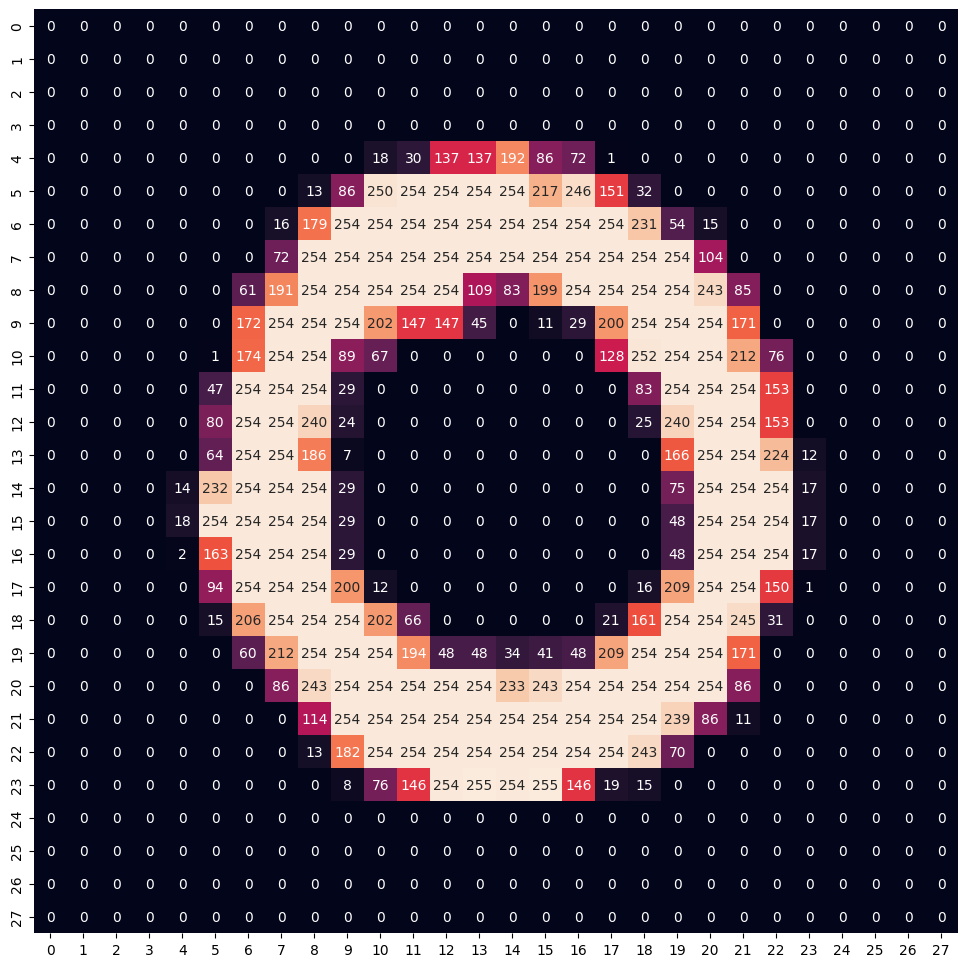

In [ ]:
digit = np.array(mnist.iloc[1][1:])
#digit[np.where(digit)[0]] = 1
plt.figure(figsize=(12,12))
sns.heatmap(digit.reshape(28,28), annot=True, fmt="d", cbar=False, square=True)

<AxesSubplot:>

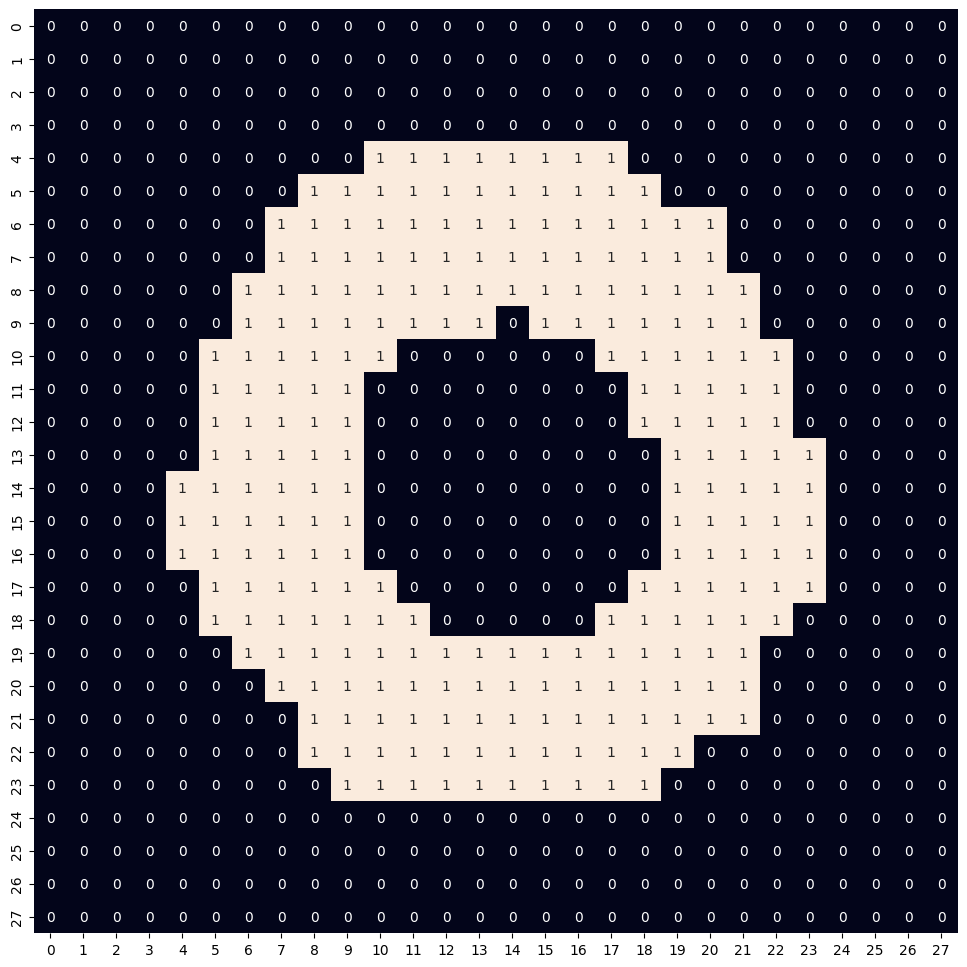

In [ ]:
digit = np.array(mnist.iloc[1][1:])
digit[np.where(digit)[0]] = 1
plt.figure(figsize=(12,12))
sns.heatmap(digit.reshape(28,28), annot=True, fmt="d", cbar=False, square=True)

In [ ]:
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 KB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 KB 38.1 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Check: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

In [ ]:
from skimage .morphology import skeletonize
skeleton = skeletonize(digit.reshape(28,28))

<AxesSubplot:>

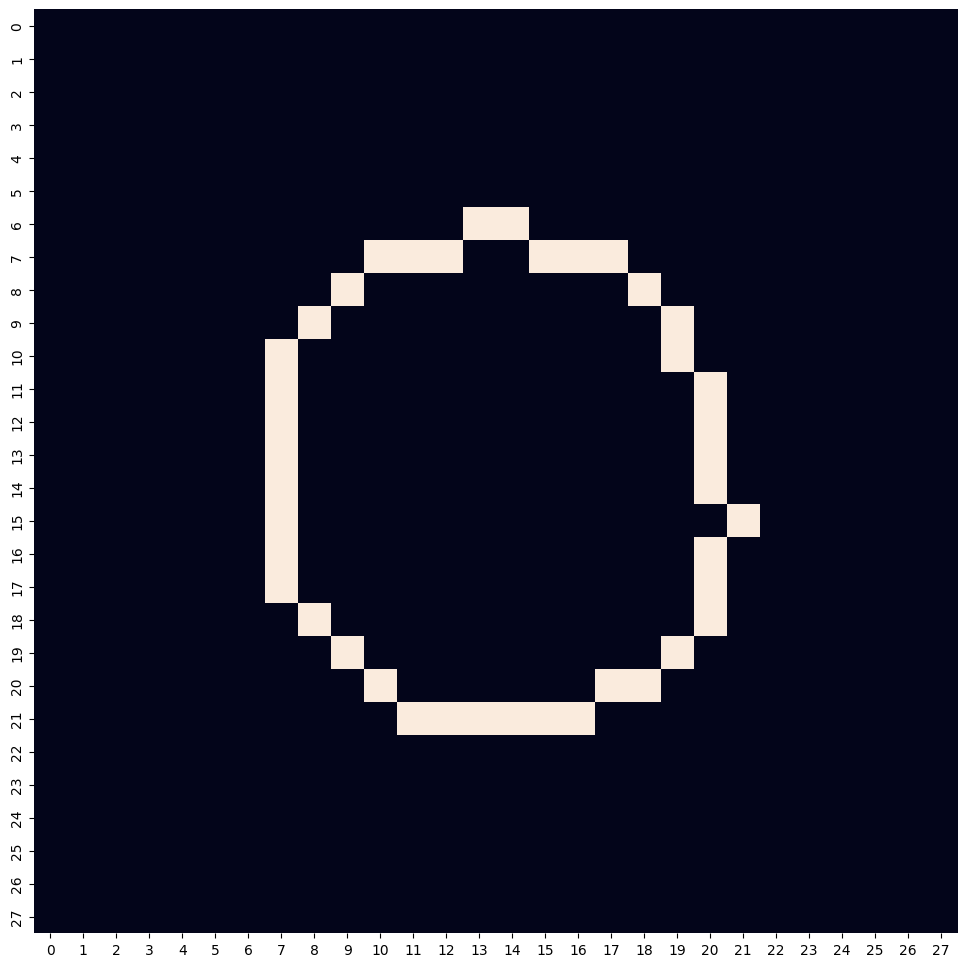

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(skeleton, annot=False, fmt="d", cbar=False, square=True)

(0.0, -27.0)

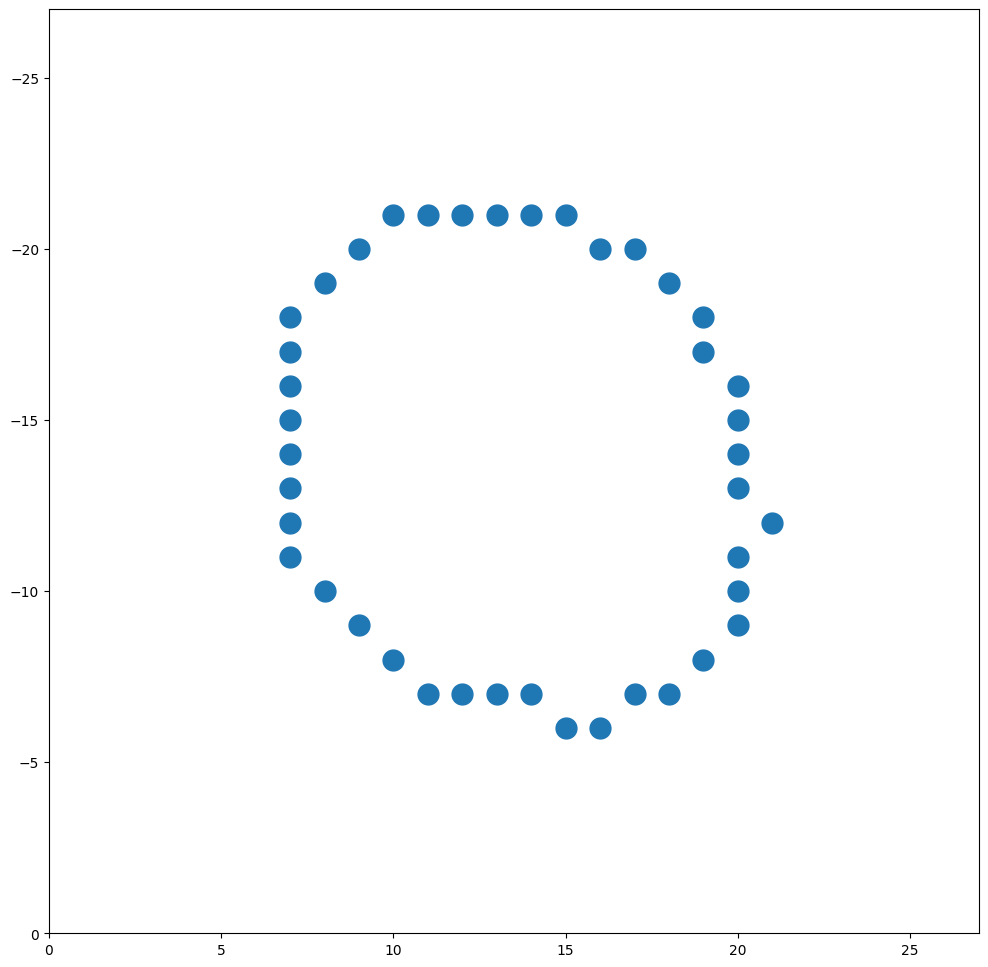

In [ ]:
# where a 1 occurs in the skelotinized image
xy = np.where(skeleton)  
xy = np.array([xyi for xyi in zip(xy[0], xy[1])])
plt.figure(figsize=(12,12))
plt.plot(xy[:,1], -xy[:,0][::-1], '.', markersize=30)
plt.xlim(0,27)
plt.ylim(0,-27)

In [ ]:
len(xy)*2, 28*28

(82, 784)

([<matplotlib.axis.XTick at 0x7f751b2c0510>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

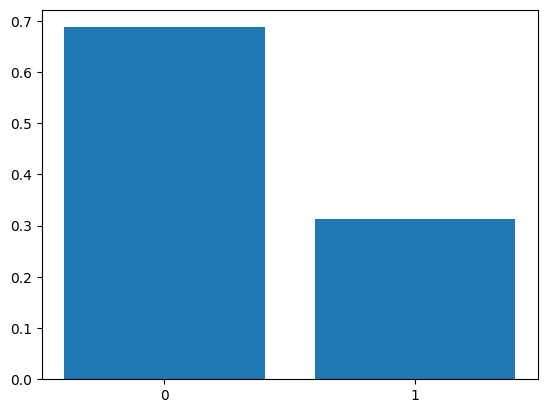

In [ ]:
x, f = np.unique(digit, return_counts=True)
plt.bar(x, f/f.sum())
plt.xticks(x, x)

![](https://1.bp.blogspot.com/-cslmSu68V8A/XrpdK89Sc1I/AAAAAAAAG7g/oVhTso-ItCMPNYKq_4E_i7FMtCr_eEcXACNcBGAsYHQ/s1600/2.png)

(0.0, 10.0)

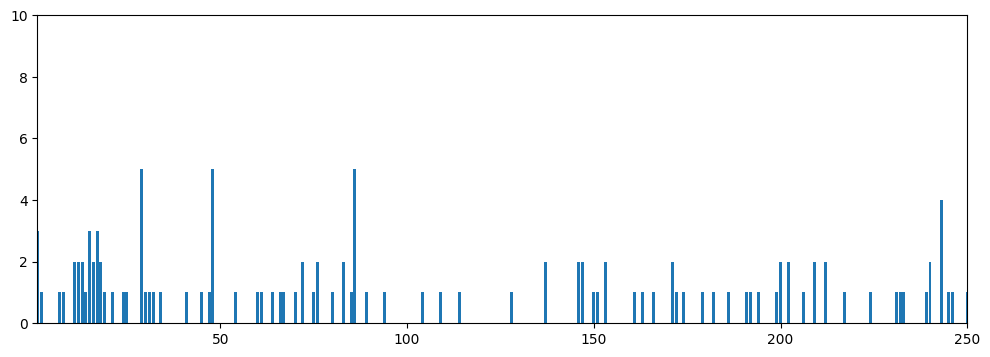

In [ ]:
# Grayscale histogram
digit_gray = np.array(mnist.iloc[1][1:])
x, f = np.unique(digit_gray, return_counts=True)
plt.figure(figsize=(12,4))
plt.bar(x, f)
plt.xlim(1,250)
plt.ylim(0,10)

(array([549.,  17.,   9.,   8.,   3.,   9.,  10.,   1.,   3.,   0.,   3.,
          6.,   4.,   5.,   4.,   7.,   5.,   2.,   6., 133.]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <BarContainer object of 20 artists>)

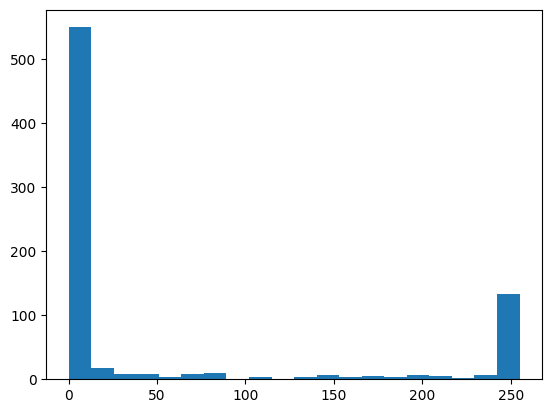

In [ ]:
# Grayscale histogram
digit_gray = np.array(mnist.iloc[1][1:])
plt.hist(digit_gray, bins=20)

In [ ]:
sample_size = 100
digit_0 = mnist.query('label == 0').head(sample_size)
digit_0.drop(columns=['label'], inplace=True)

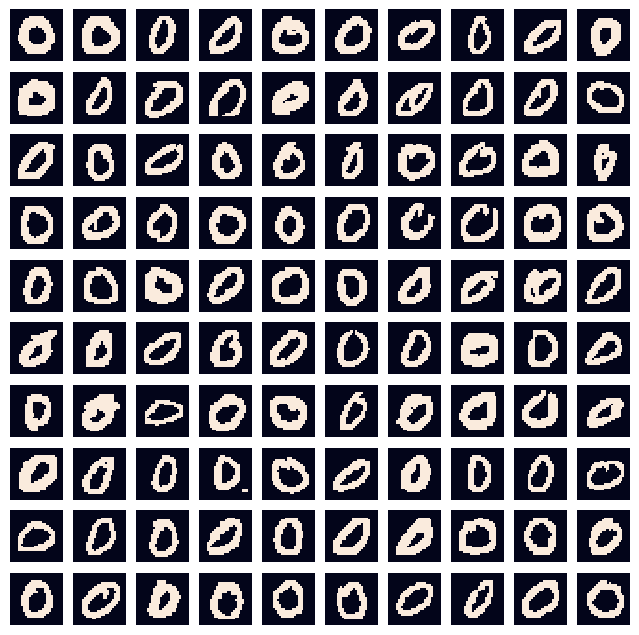

In [ ]:
plt.figure(figsize=(8,8)) 
index = 0 
for obs_i in digit_0.iterrows(): 
    plt.subplot(10, 10, index+1)
    digit_0.iloc[index][np.where(digit_0.iloc[index])[0]] = 1
    sns.heatmap(np.array(obs_i[1]).reshape(28,28), cbar=False)     
    plt.axis('off')     
    index += 1

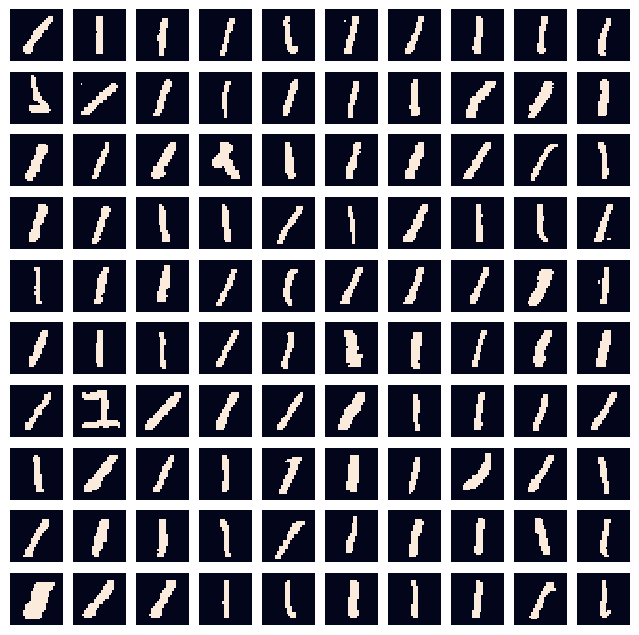

In [ ]:
sample_size = 100
digit_1 = mnist.query('label == 1').head(sample_size)
digit_1.drop(columns=['label'], inplace=True)

plt.figure(figsize=(8,8)) 
index = 0 
for obs_i in digit_1.iterrows(): 
    plt.subplot(10, 10, index+1)
    digit_1.iloc[index][np.where(digit_1.iloc[index])[0]] = 1
    sns.heatmap(np.array(obs_i[1]).reshape(28,28), cbar=False)     
    plt.axis('off')     
    index += 1

(<matplotlib.image.AxesImage at 0x7f751c692890>, 0.33163265306122447)

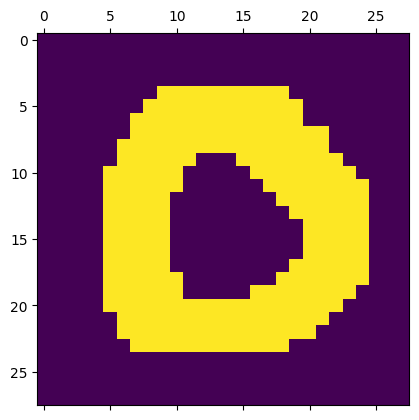

In [ ]:
plt.matshow(np.array(digit_0.iloc[1]).reshape(28,28)), digit_0.iloc[1].mean()

(<matplotlib.image.AxesImage at 0x7f751b327f50>, 0.12372448979591837)

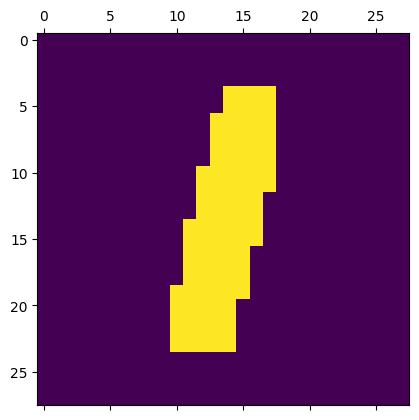

In [ ]:
plt.matshow(np.array(digit_1.iloc[59]).reshape(28,28)), digit_1.iloc[0].mean()

In [ ]:
mean_d0 = digit_0.mean(axis=1)
mean_d1 = digit_1.mean(axis=1)

Text(0.5, 0, 'Digit mean')

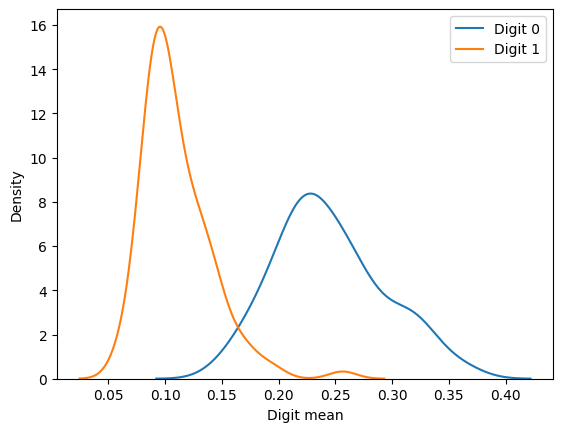

In [ ]:
sns.kdeplot(mean_d0)
sns.kdeplot(mean_d1)
plt.legend(["Digit 0", "Digit 1"])
plt.xlabel("Digit mean")

In [ ]:
std_d0 = digit_0.std(axis=1)
std_d1 = digit_1.std(axis=1)

Text(0.5, 0, 'Digit std')

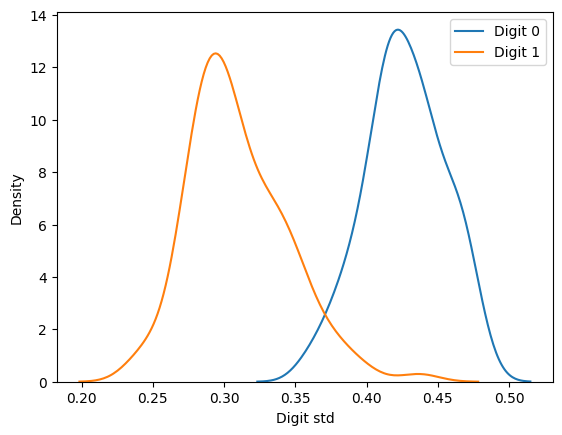

In [ ]:
sns.kdeplot(std_d0)
sns.kdeplot(std_d1)
plt.legend(["Digit 0", "Digit 1"])
plt.xlabel("Digit std")

In [ ]:
digit_moments = pd.DataFrame({'mean': np.concatenate((mean_d0, mean_d1)), 
'std': np.concatenate((std_d0, std_d1)), "digit": ['0']*100+['1']*100})
digit_moments.head()

,mean,std,digit
0,0.312500,0.463808,0
1,0.331633,0.471100,0
2,0.191327,0.393597,0
3,0.233418,0.423276,0
4,0.313776,0.464323,0


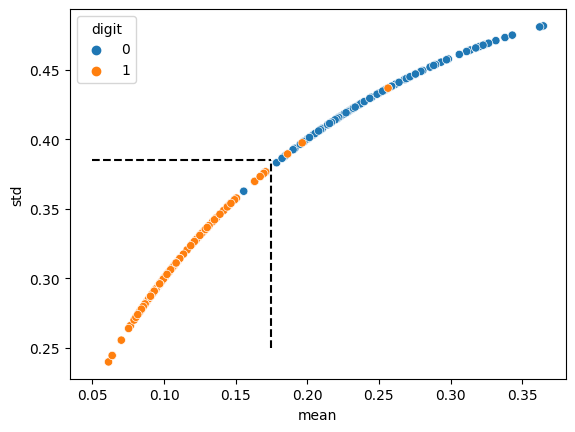

In [ ]:
sns.scatterplot(data=digit_moments, x="mean", y="std", hue='digit')
plt.hlines(0.385, 0.05, 0.175, linestyles="dashed", colors='k')
plt.vlines(0.175, 0.25, 0.385, linestyles="dashed", colors='k')

<AxesSubplot:xlabel='label', ylabel='count'>

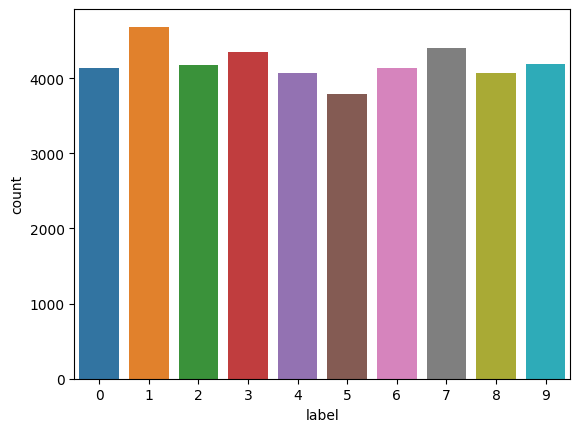

In [ ]:
sns.countplot(data=mnist, x="label")

<AxesSubplot:>

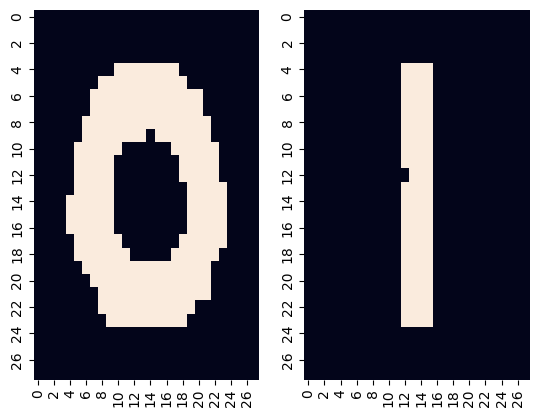

In [ ]:
plt.subplot(1,2,1)
sns.heatmap(np.array(digit_0.iloc[0]).reshape(28,28), cbar=False)
#plt.axis('off')
plt.subplot(1,2,2)
sns.heatmap(np.array(digit_1.iloc[1]).reshape(28,28), cbar=False)
#plt.axis('off')

<AxesSubplot:>

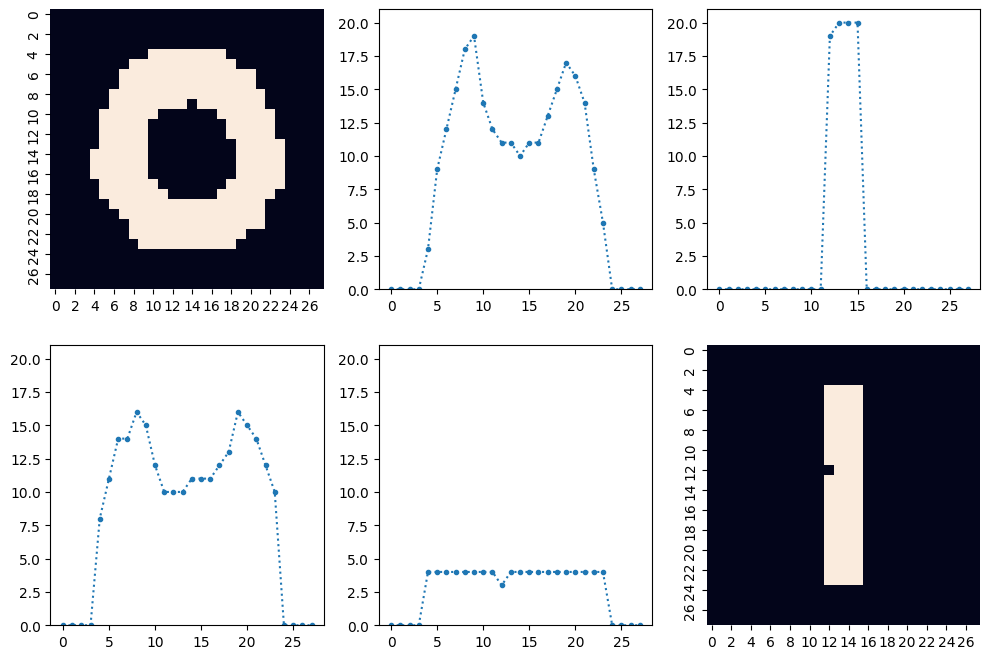

In [ ]:
d0 = np.array(digit_0.iloc[0]).reshape(28,28)
d1 = np.array(digit_1.iloc[1]).reshape(28,28)

plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.heatmap(d0, cbar=False)
plt.subplot(2,3,2)
plt.plot(d0.sum(axis=0),':.')
plt.ylim(0, 21)
plt.subplot(2,3,3)
plt.plot(d1.sum(axis=0),':.')
plt.ylim(0, 21)

plt.subplot(2,3,4)
plt.plot(d0.sum(axis=1),':.')
plt.ylim(0, 21)
plt.subplot(2,3,5)
plt.plot(d1.sum(axis=1),':.')
plt.ylim(0, 21)
plt.subplot(2,3,6)
sns.heatmap(d1, cbar=False)

<AxesSubplot:xlabel='mean', ylabel='digit'>

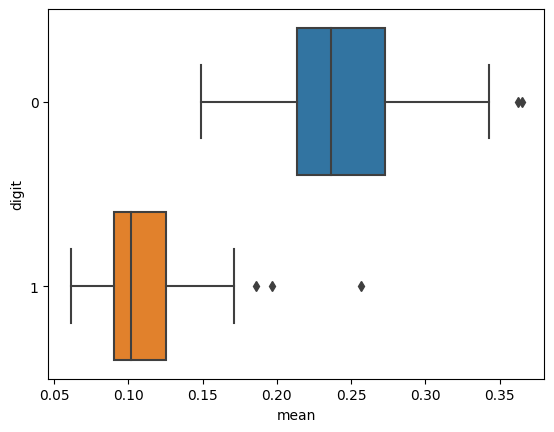

In [ ]:
sns.boxplot(data=digit_moments, x="mean", y="digit")

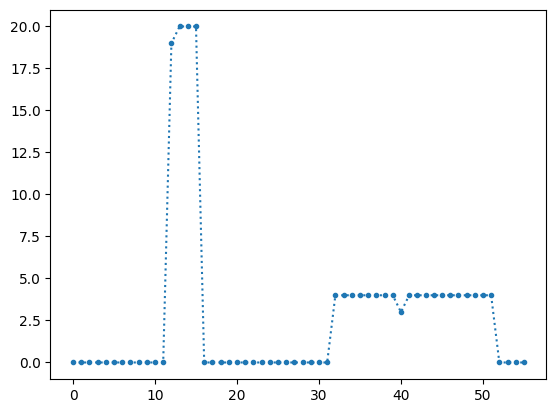

In [ ]:
plt.plot(np.concatenate((d1.sum(axis=0), d1.sum(axis=1))),':.')

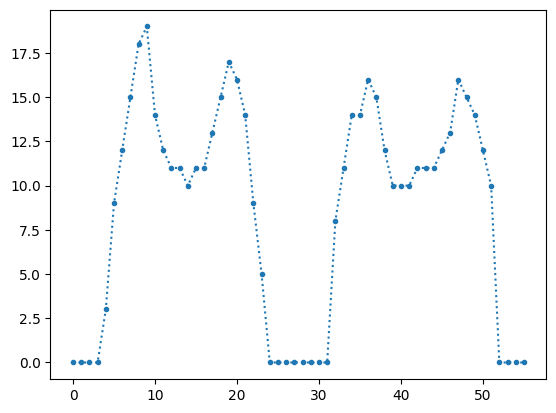

In [ ]:
plt.plot(np.concatenate((d0.sum(axis=0), d0.sum(axis=1))),':.')

In [ ]:
# Measure with and height of digits 0
width_0 = []
height_0 = []
for d0 in digit_0.iterrows():
    d02d = np.array(d0[1]).reshape(28,28)

    ds = np.where(d02d.sum(axis=0))[0]
    w0 = ds[-1] - ds[0]
    width_0 += [w0]

    ds = np.where(d02d.sum(axis=1))[0]
    h0 = ds[-1] - ds[0]
    height_0 += [h0]

# Measure with and height of digits 1
width_1 = []
height_1 = []
for d1 in digit_1.iterrows():
    d12d = np.array(d1[1]).reshape(28,28)

    ds = np.where(d12d.sum(axis=0))[0]
    w1 = ds[-1] - ds[0]
    width_1 += [w1]

    ds = np.where(d12d.sum(axis=1))[0]
    h1 = ds[-1] - ds[0]
    height_1 += [h1]

digit_range = pd.DataFrame({'width': np.concatenate((width_0, width_1)), 
'height': np.concatenate((height_0, height_1)), 
'mean': np.concatenate((mean_d0, mean_d1)), 
'std': np.concatenate((std_d0, std_d1)),
"digit": ['0']*100+['1']*100})
digit_range.head()

,width,height,mean,std,digit
0,19,19,0.312500,0.463808,0
1,19,19,0.331633,0.471100,0
2,13,19,0.191327,0.393597,0
3,17,19,0.233418,0.423276,0
4,19,19,0.313776,0.464323,0


|    |   width |   height |     mean |      std |   sum_R + sum_C |   digit |
|---:|--------:|---------:|---------:|---------:|--------:|--------:|
|  0 |      19 |       19 | 0.3125   | 0.463808 |       28+28 |       0 |
|  1 |      19 |       19 | 0.331633 | 0.4711   |       28+28 |       0 |
|  2 |      13 |       19 | 0.191327 | 0.393597 |       28+28 |       0 |
|  3 |      17 |       19 | 0.233418 | 0.423276 |       28+28 |       0 |
|  4 |      19 |       19 | 0.313776 | 0.464323 |       28+28 |       0 |

<AxesSubplot:xlabel='width', ylabel='mean'>

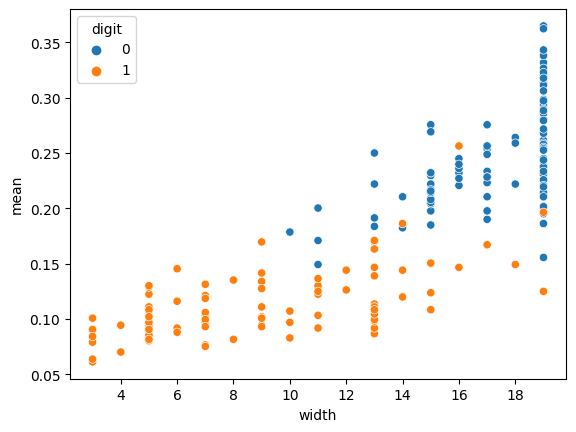

In [ ]:
sns.scatterplot(data=digit_range, x="width", y="mean", hue='digit')

<AxesSubplot:xlabel='height', ylabel='mean'>

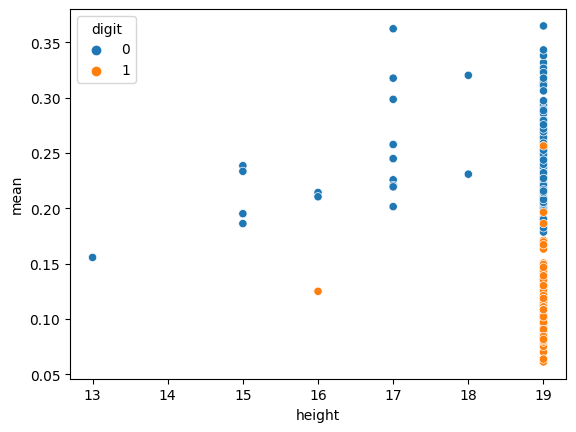

In [ ]:
sns.scatterplot(data=digit_range, x="height", y="mean", hue='digit')

<AxesSubplot:xlabel='height', ylabel='Density'>

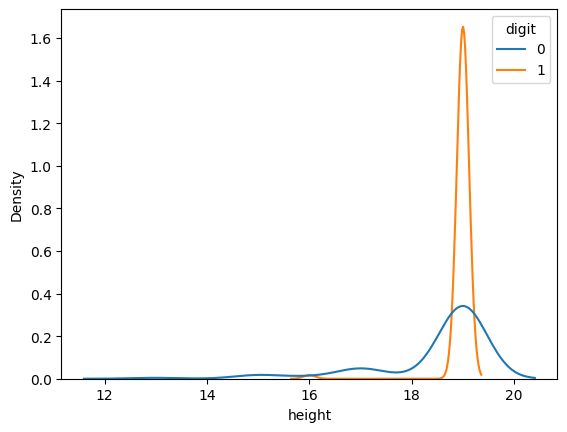

In [ ]:
sns.kdeplot(data=digit_range, x="height", hue="digit")

<AxesSubplot:xlabel='width', ylabel='Density'>

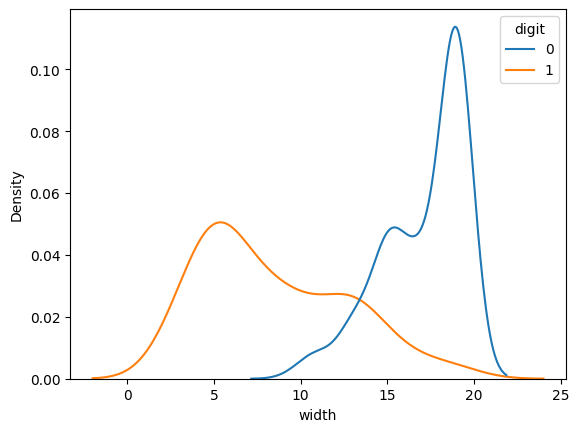

In [ ]:
sns.kdeplot(data=digit_range, x="width", hue="digit")

Check: 
- https://github.com/marsgr6/r-scripts/blob/master/notebooks/pattern_preprocessing.ipynb

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>